In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, roc_curve 
from sklearn.model_selection import cross_val_score

# Mengabaikan peringatan
warnings.filterwarnings('ignore')

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Jamil Ulumudin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
dataset = pd.read_csv('Prostate_Cancer.csv')
display(dataset.head(), dataset.shape)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


(100, 10)

In [ ]:
dataset['diagnosis_result'] = dataset['diagnosis_result'].apply(lambda x: 1 if x == 'M' else 0)
dataset.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
isnull_number = []
for i in dataset.columns:
    x = dataset[i].isnull().sum()
    isnull_number.append(x)
display(pd.DataFrame(isnull_number, index = dataset.columns, columns = ["Total Missing Values"]))

jumlah_duplikat = dataset.duplicated().value_counts()
print("duplikasi data: \n", jumlah_duplikat)

,Total Missing Values
id,0
diagnosis_result,0
radius,0
texture,0
perimeter,0
area,0
smoothness,0
compactness,0
symmetry,0
fractal_dimension,0


duplikasi data: 
 False    100
dtype: int64


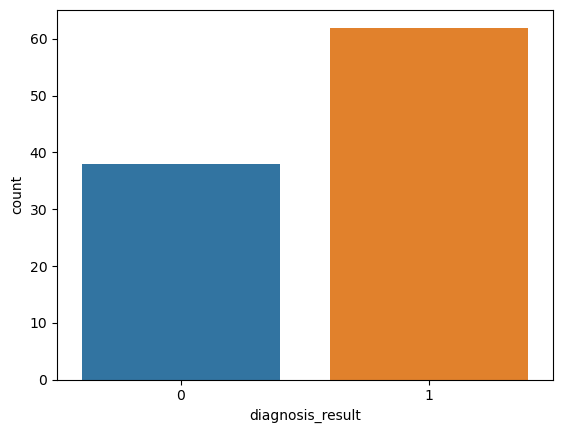

In [ ]:
# Visualize distribution of target variable
sns.countplot(x='diagnosis_result', data=dataset)
plt.show()

In [ ]:
# Mengambil atribut dan label target
features = dataset.drop('diagnosis_result', axis=1)
target = dataset['diagnosis_result']

# Menghitung matriks korelasi antara atribut dan target
correlation_matrix = pd.concat([features, target], axis=1).corr()

# Menampilkan tabel dengan angka, fitur, dan nilai korelasi
correlation_table = correlation_matrix['diagnosis_result'].reset_index()
correlation_table.columns = ['Fitur', 'Korelasi']
correlation_table = correlation_table.sort_values(by='Korelasi', ascending=False)

print("Korelasi antara fitur dengan label diagnosis_result")
display(correlation_table)

Korelasi antara fitur dengan label diagnosis_result


,Fitur,Korelasi
9,diagnosis_result,1.000000
3,perimeter,0.607498
4,area,0.562444
6,compactness,0.512234
7,symmetry,0.233028
5,smoothness,0.197616
2,texture,0.070735
8,fractal_dimension,0.008180
1,radius,-0.176967
0,id,-0.316889


In [ ]:
X = dataset[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']]
y = dataset[['diagnosis_result']]

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=73)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
print("Sebelum SMOTE:", y.value_counts())
print("Setelah SMOTE:", y_resampled.value_counts())


Sebelum SMOTE: diagnosis_result
1                   62
0                   38
dtype: int64
Setelah SMOTE: diagnosis_result
0                   62
1                   62
dtype: int64


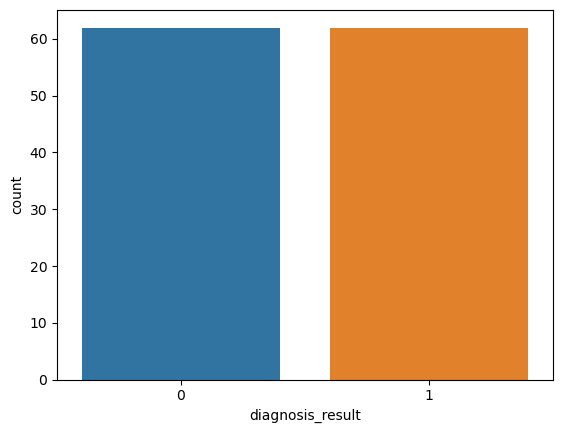

(124, 8)
(124, 1)


In [ ]:
# Visualize distribution of target variable
sns.countplot(x='diagnosis_result', data=y_resampled)
plt.show()
print(X_resampled.shape)
print(y_resampled.shape)

In [ ]:
# Split data into training and testing sets - Percobaan 1
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=109)

In [ ]:
#Train Random Forest model
model_rf = RandomForestClassifier(n_estimators = 120, criterion = 'gini', max_depth=3, random_state=95)
model_rf.fit(X_train, y_train)

# Make predictions on testing set
y_pred1 = model_rf.predict(X_test)



# Train SVM model
svc_model = SVC(C=15, kernel='rbf', gamma=0.00301, max_iter=1000)
svc_model.fit(X_train, y_train)

# Make predictions on testing set
y_pred2 = svc_model.predict(X_test)


# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on testing set
y_pred3 = nb.predict(X_test)

In [ ]:
# Menghitung classification report
report1 = classification_report(y_test, y_pred1)

# Mencetak classification report
print("\nClassification Report Using RF:")
print(report1)

# Evaluate model performance using accuracy, precision, f1 score, recall score
acc1 = accuracy_score(y_test, y_pred1)
prec1 = precision_score(y_test, y_pred1, average='weighted')
f11 = f1_score(y_test, y_pred1, average='weighted')
rcl1 = recall_score(y_test, y_pred1, average='weighted')

# Membuat DataFrame untuk evaluasi metrik
df_eval1 = pd.DataFrame({'Accuracy': [acc1], 'Precision': [prec1], 'Recall Score': [rcl1], 'F1 Score': [f11]})

# Menampilkan evaluasi metrik dalam satu tabel dengan grid
display(df_eval1)


Classification Report Using RF:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.75      1.00      0.86         9

    accuracy                           0.88        25
   macro avg       0.88      0.91      0.88        25
weighted avg       0.91      0.88      0.88        25



,Accuracy,Precision,Recall Score,F1 Score
0,0.88,0.91,0.88,0.882365


In [ ]:
# Menghitung classification report
report2 = classification_report(y_test, y_pred2)

# Mencetak classification report
print("\nClassification Report Using SVM:")
print(report2)

# Evaluate model performance using accuracy, precision, f1 score, recall score
acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2, average='weighted')
f12 = f1_score(y_test, y_pred2, average='weighted')
rcl2 = recall_score(y_test, y_pred2, average='weighted')

# Membuat DataFrame untuk evaluasi metrik
df_eval2 = pd.DataFrame({'Accuracy': [acc2], 'Precision': [prec2], 'Recall Score': [rcl2], 'F1 Score': [f12],})

# Menampilkan evaluasi metrik dalam satu tabel dengan grid
display(df_eval2)


Classification Report Using SVM:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.82      1.00      0.90         9

    accuracy                           0.92        25
   macro avg       0.91      0.94      0.92        25
weighted avg       0.93      0.92      0.92        25



,Accuracy,Precision,Recall Score,F1 Score
0,0.92,0.934545,0.92,0.921333


In [ ]:
# Menghitung classification report
report3 = classification_report(y_test, y_pred3)

# Mencetak classification report
print("\nClassification Report Using NB:")
print(report3)

# Evaluate model performance using accuracy, precision, f1 score, recall score
acc3 = accuracy_score(y_test, y_pred3)
prec3 = precision_score(y_test, y_pred3, average='weighted')
f13 = f1_score(y_test, y_pred3, average='weighted')
rcl3 = recall_score(y_test, y_pred3, average='weighted')

# Membuat DataFrame untuk evaluasi metrik
df_eval2 = pd.DataFrame({'Accuracy': [acc3], 'Precision': [prec3], 'Recall Score': [rcl3], 'F1 Score': [f13]})

# Menampilkan evaluasi metrik dalam satu tabel dengan grid
display(df_eval2)


Classification Report Using NB:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25



,Accuracy,Precision,Recall Score,F1 Score
0,0.88,0.885333,0.88,0.881222


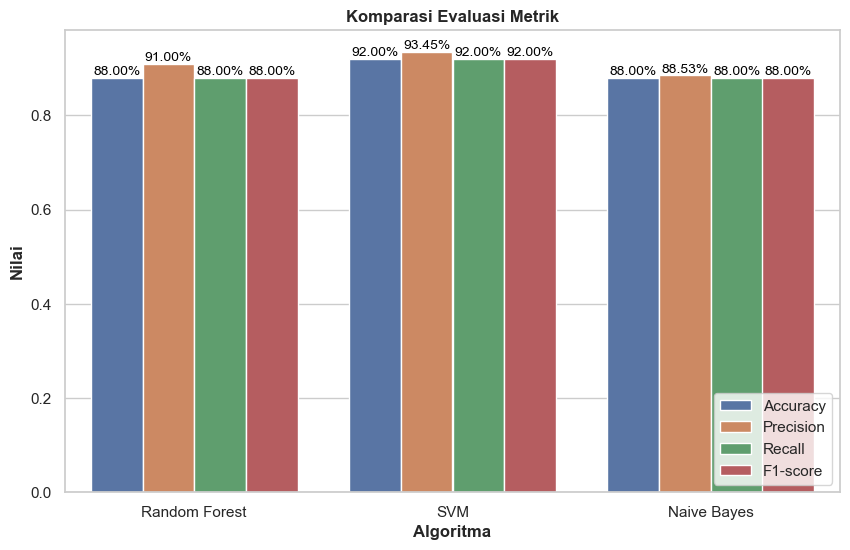

In [ ]:
# Data evaluasi untuk setiap algoritma
algorithm_names = ['Random Forest', 'SVM', 'Naive Bayes']
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

accuracy_scores.append(acc1)
accuracy_scores.append(acc2)
accuracy_scores.append(acc3)
precision_scores.append(prec1)
precision_scores.append(prec2)
precision_scores.append(prec3)
recall_scores.append(rcl1)
recall_scores.append(rcl2)
recall_scores.append(rcl3)
f1_scores.append(rcl1)
f1_scores.append(rcl2)
f1_scores.append(rcl3)

# Membuat dataframe dari data evaluasi
eval_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Menggabungkan metrik evaluasi menjadi satu kolom menggunakan melt()
eval_df = eval_df.melt('Algorithm', var_name='Metric', value_name='Score')

# Membuat plot menggunakan seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Score', hue='Metric', data=eval_df)
plt.title('Komparasi Evaluasi Metrik', fontweight='bold')
plt.xlabel('Algoritma', fontweight='bold')
plt.ylabel('Nilai', fontweight='bold')

# Menambahkan nilai persentase di atas setiap batang
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=10, color='black')

# Menempatkan legenda di posisi kanan bawah
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

plt.show()


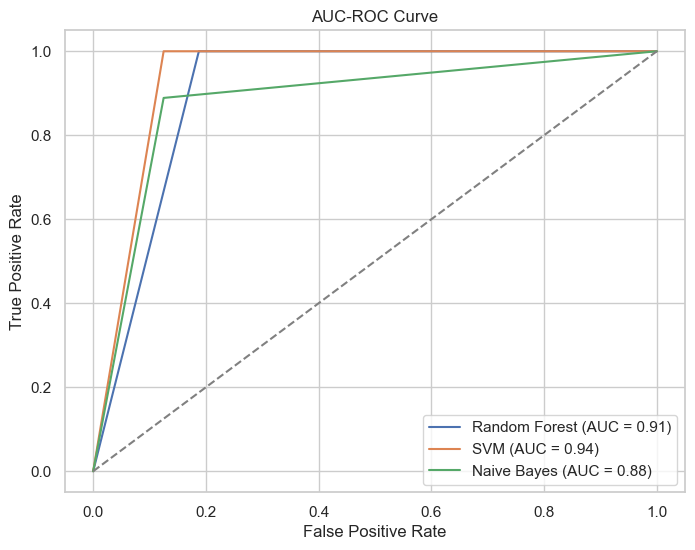

In [ ]:
# Calculate AUC for each model
auc1 = roc_auc_score(y_test, y_pred1)
auc2 = roc_auc_score(y_test, y_pred2)
auc3 = roc_auc_score(y_test, y_pred3)

# Calculate ROC curve for each model
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred3)

# Plot AUC-ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'Random Forest (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'SVM (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'Naive Bayes (AUC = {auc3:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

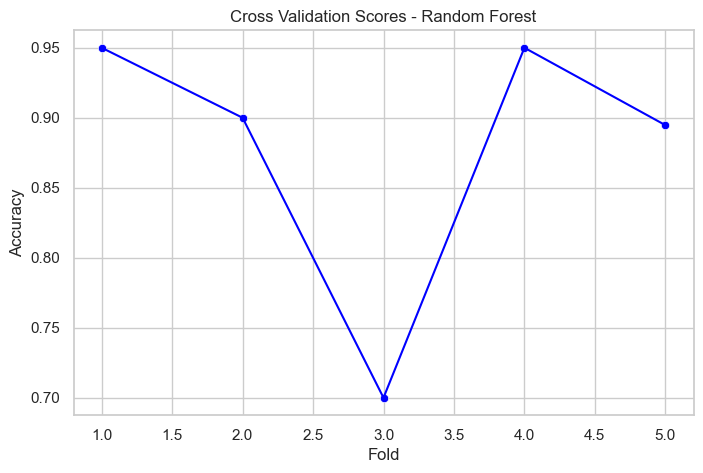

,Fold,Accuracy
0,1,0.950000
1,2,0.900000
2,3,0.700000
3,4,0.950000
4,5,0.894737


In [ ]:
# models = [model_rf, svc_model, nb]
scoresrf = cross_val_score(model_rf, X_train, y_train, scoring='accuracy', cv=5)
skorRF = {'Fold': range(1, 6),
        'Accuracy': scoresrf}
skorRF_CV = pd.DataFrame(skorRF)

sns.set(style="whitegrid")  # Set style grid pada plot
plt.figure(figsize=(8, 5))  # Tentukan ukuran plot

# Buat scatter plot
sns.scatterplot(x="Fold", y="Accuracy", data=skorRF_CV, color='blue')

# Buat line plot
sns.lineplot(x="Fold", y="Accuracy", data=skorRF_CV, color='blue')

# Atur judul dan label sumbu
plt.title("Cross Validation Scores - Random Forest")
plt.xlabel("Fold")
plt.ylabel("Accuracy")

# Tampilkan plot
plt.show()

display(skorRF_CV)

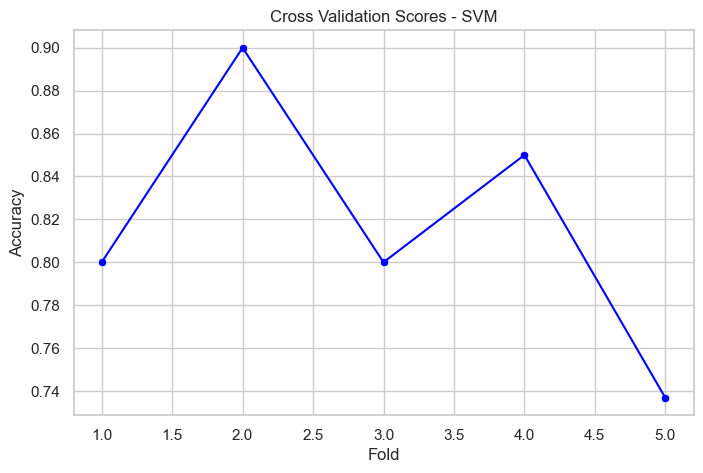

,Fold,Accuracy
0,1,0.800000
1,2,0.900000
2,3,0.800000
3,4,0.850000
4,5,0.736842


In [ ]:
# models = [model_rf, svc_model, nb]
scoressvm = cross_val_score(svc_model, X_train, y_train, scoring='accuracy', cv=5)
skorSVM = {'Fold': range(1, 6),
        'Accuracy': scoressvm}
skorSVM_CV = pd.DataFrame(skorSVM)

sns.set(style="whitegrid")  # Set style grid pada plot
plt.figure(figsize=(8, 5))  # Tentukan ukuran plot

# Buat scatter plot
sns.scatterplot(x="Fold", y="Accuracy", data=skorSVM_CV, color='blue')

# Buat line plot
sns.lineplot(x="Fold", y="Accuracy", data=skorSVM_CV, color='blue')

# Atur judul dan label sumbu
plt.title("Cross Validation Scores - SVM")
plt.xlabel("Fold")
plt.ylabel("Accuracy")

# Tampilkan plot
plt.show()

display(skorSVM_CV)

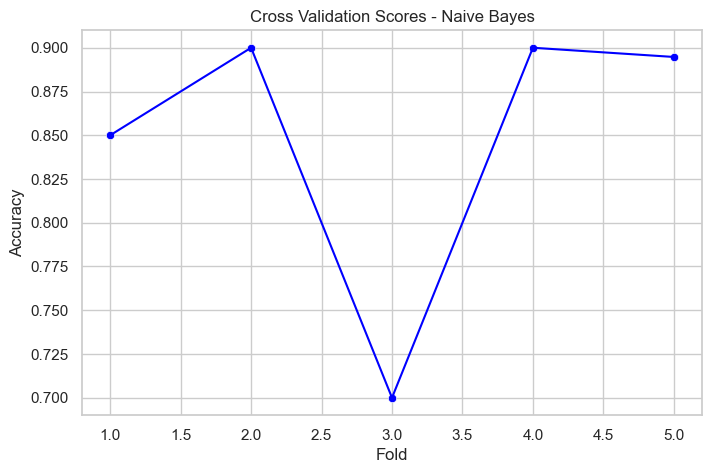

,Fold,Accuracy
0,1,0.850000
1,2,0.900000
2,3,0.700000
3,4,0.900000
4,5,0.894737


In [ ]:
# models = [model_rf, svc_model, nb]
scoresnb = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv=5)
skorNB = {'Fold': range(1, 6),
        'Accuracy': scoresnb}
skorNB_CV = pd.DataFrame(skorNB)

sns.set(style="whitegrid")  # Set style grid pada plot
plt.figure(figsize=(8, 5))  # Tentukan ukuran plot

# Buat scatter plot
sns.scatterplot(x="Fold", y="Accuracy", data=skorNB_CV, color='blue')

# Buat line plot
sns.lineplot(x="Fold", y="Accuracy", data=skorNB_CV, color='blue')

# Atur judul dan label sumbu
plt.title("Cross Validation Scores - Naive Bayes")
plt.xlabel("Fold")
plt.ylabel("Accuracy")

# Tampilkan plot
plt.show()

display(skorNB_CV)